In [61]:
from google.colab import drive # remove the cell if not using colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
base_path = Path('/content/drive/MyDrive/data') # change path here!

# Klasyfikacja pasa≈ºer√≥w Titanica
Po wys≈Çaniu raportu pozosta≈Ço ju≈º tylko czekaƒá. Dni mija≈Çy, ale w ko≈Ñcu telefon zadzwoni≈Ç. Okaza≈Ço siƒô, ≈ºe po konsultacji Twojego raportu z najbardziej do≈õwiadczonymi specjalistami w dziedzinie, zleceniodawca zdecydowa≈Ç siƒô powierzyƒá Ci dalszƒÖ czƒô≈õƒá tajemniczego zadania. Chodzi oczywi≈õcie o... **stworzenie modelu przewidujƒÖcego szanse prze≈ºycia katastrofy Titanica**.

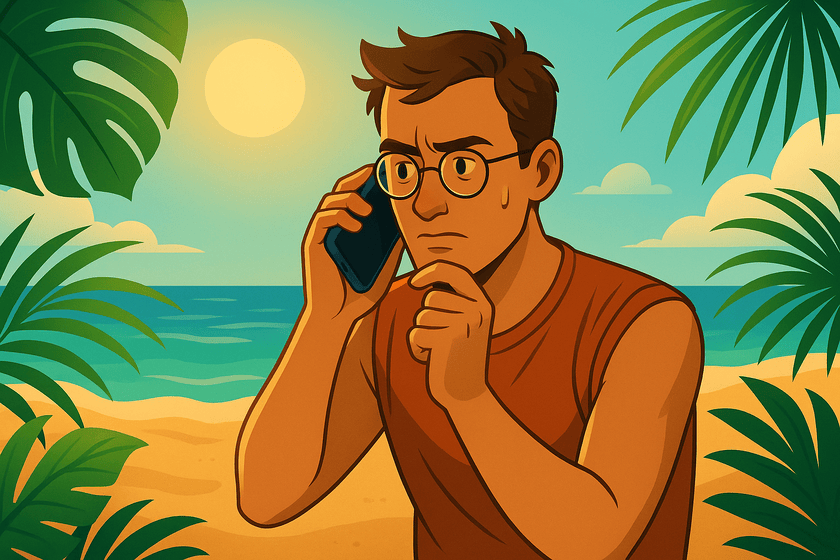

(*AI-generated image*)


#### Twoim celem bƒôdzie jest wytrenowanie modeli do klasyfikacji ka≈ºdego pasa≈ºera Titanica jako ofiary (0) lub osoby, kt√≥ra prze≈ºy≈Ça (1).

Poni≈ºej znajdziesz pytania, kt√≥re mogƒÖ byƒá pomocne w zadaniu:

- Czego nauczy≈Ço Ciƒô o badanym zbiorze danych poprzednie zadanie? Jak mo≈ºesz wykorzystaƒá wyciƒÖgniƒôte z niego wnioski w procesie tworzenia modelu?
- Jak przeprowadzenie standaryzacji danych mo≈ºe wp≈Çywaƒá na zachowanie modelu?
- Co m√≥j model robi i w jaki spos√≥b?
- Jak nie przetrenowaƒá wybranego modelu?
- Jaki wynik klasyfikacji mo≈ºemy uznaƒá za *dobry*?


Wymagania:
- Wypisz obserwacje z pierwszego zadania, kt√≥re pomogƒÖ Ci w tym. Co by≈Ço przydatne, a co okaza≈Ço siƒô bezu≈ºyteczne?
- [Nie doprowad≈∫](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do ~~przecieku statku~~ wycieku danych (np. nie ucz modelu na danych testowych). Nauczone modele odpal na danych treningowych i testowych - opisz uzyskane wyniki.
- Stw√≥rz baseline, czyli dla por√≥wnania sprawd≈∫ jak z zadaniem radzi sobie [Dummy Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) (je≈õli Tw√≥j docelowy model radzi sobie gorzej - uciekaj)
- Przeprowad≈∫ badania na dw√≥ch wybranych modelach uczenia maszynowego (np. spo≈õr√≥d: drzew decyzyjnych, SVM, MLP, KNN, z gwiazdkƒÖ [XGBoost](https://xgboost.readthedocs.io/en/stable))
- W badaniach u≈ºyj wybranych metryk. Wyb√≥r uzasadnij.
- Dla ka≈ºdego modelu wybierz co najmniej dwa hiperparametry i przeprowad≈∫ badania zale≈ºno≈õci wynik√≥w metryk od warto≈õci hiperparametr√≥w. Zwizualizuj wszystko ≈Çadnie, zastan√≥w siƒô dlaczego tak mog≈Ço byƒá i wyciƒÖgnij i wypisz wnioski.
- Podsumuj przeprowadzone badania, wypisz wnioski.

Niezmiennie, zadbaj o czytelno≈õƒá kodu i nazewnictwo zmiennych. Je≈õli jaki≈õ wycinek kodu siƒô powtarza, to wyodrƒôbnij go do funkcji. Postaraj siƒô zamieszczaƒá swoje wnioski w postaci komentarza `Markdown`.

Je≈õli chcesz, mo≈ºesz sprawdziƒá (przyjmujƒÖc pewne za≈Ço≈ºenia), jakie by≈Çyby Twoje szanse na Titanicu.

Uwaga! Je≈õli Titanic to dla Ciebie nic i baaaaardzo chcesz to mo≈ºesz w ramach tego zadania zajƒÖƒá siƒô [bardziej wymagajƒÖcym](https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data) zbiorem.



# ***Polecam rozwinƒÖƒá spis tre≈õci bo mega u≈Çatwi czytanko :)***

In [63]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

# **ROZWIƒÑZANIE ZADANIA 1 EDA:**



In [64]:
titanic_df.head(5)

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [65]:
# Sprawdzam typy danych w tabeli

titanic_df.info()
#titanic_df.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      793 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [66]:
titanic_df.describe(include = "all")

Survived      Pclass                 Name   Sex         Age  \
count   891.000000  891.000000                  891   891  714.000000   
unique         NaN         NaN                  891     2         NaN   
top            NaN         NaN  Dooley, Mr. Patrick  male         NaN   
freq           NaN         NaN                    1   577         NaN   
mean      0.383838    2.308642                  NaN   NaN   29.699118   
std       0.486592    0.836071                  NaN   NaN   14.526497   
min       0.000000    1.000000                  NaN   NaN    0.420000   
25%       0.000000    2.000000                  NaN   NaN   20.125000   
50%       0.000000    3.000000                  NaN   NaN   28.000000   
75%       1.000000    3.000000                  NaN   NaN   38.000000   
max       1.000000    3.000000                  NaN   NaN   80.000000   

             SibSp       Parch  Ticket        Fare Cabin Embarked  
count   891.000000  891.000000     891  793.000000   204      889  
unique         NaN         NaN     681         NaN   147        3  
top            NaN         NaN  347082         NaN    G6        S  
freq           NaN         NaN       7         NaN     4      644  
mean      0.523008    0.381594     NaN   33.123938   NaN      NaN  
std       1.102743    0.806057     NaN   51.578312   NaN      NaN  
min       0.000000    0.000000     NaN    0.000000   NaN      NaN  
25%       0.000000    0.000000     NaN    7.925000   NaN      NaN  
50%       0.000000    0.000000     NaN   14.500000   NaN      NaN  
75%       1.000000    0.000000     NaN   31.275000   NaN      NaN  
max       8.000000    6.000000     NaN  512.329200   NaN      NaN

## **1 punkt - Oczyszczenie tabeli:**



In [67]:
titanic_df.isna().sum() # Sprawdzam gdzie sƒÖ braki

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare         98
Cabin       687
Embarked      2
dtype: int64

### ≈Åatwo zauwa≈ºyƒá ≈ºe:
- Kolumna **Cabin** jest pe≈Çna brak√≥w i informacje z niej ciƒô≈ºko by≈Çoby zastƒÖpiƒá/zgadnƒÖƒá, wiƒôc zostanie usuniƒôta za momencik üí£
- Zbƒôdna w celu okre≈õlania szans na przetrwanie bƒôdzie te≈º kolumna **Name**. Tak samo **Ticket** , numer biletu nic nam nie powie
- W kolumnie **Age** braki u≈õrednie biorƒÖc pod uwagƒô p≈Çeƒá
- W kolumnie **Fare** braki bƒôdƒÖ u≈õrednionƒÖ warto≈õciƒÖ, poniewa≈º wydane pieniƒÖdze na bilet nie majƒÖ takiego wp≈Çywu na prze≈ºycie danego ludka
- Za to braki w kolumnie **Embarked** zostanƒÖ uzupe≈Çnione po prostu *Unknown*



In [68]:
titanic_df.drop(columns=['Cabin'], inplace = True) # Usuniƒôcie Cabin
titanic_df.drop(columns=['Name'], inplace = True) # Usuniƒôcie Name
titanic_df.drop(columns=['Ticket'], inplace = True) # Usuniƒôcie Ticket

In [69]:
# Kolumna Age

mean_age = np.floor(titanic_df.groupby('Sex')['Age'].mean())               # ≈õrednia dla mƒô≈ºczyzn i kobiet
mask_female = (titanic_df['Sex'] == 'female') & (titanic_df['Age'].isna()) # maska dla kobiet
mask_male = (titanic_df['Sex'] == 'male') & (titanic_df['Age'].isna())     # maska dla mƒô≈ºczyzn

titanic_df.loc[mask_female, 'Age'] = mean_age['female']
titanic_df.loc[mask_male, 'Age'] = mean_age['male']

In [70]:
# Kolumna Fare

titanic_df['Fare'].fillna(titanic_df['Fare'].mean(), inplace = True) # U≈ºycia fillna do uzupe≈Çniania brak√≥w

/tmp/ipython-input-3743736266.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Fare'].fillna(titanic_df['Fare'].mean(), inplace = True) # U≈ºycia fillna do uzupe≈Çniania brak√≥w


In [71]:
# Kolumna Embarked

titanic_df['Embarked'].fillna('Unknown' , inplace = True)

/tmp/ipython-input-3381570074.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna('Unknown' , inplace = True)


In [72]:
# Sprawdzenie czy sƒÖ jeszcze jakie≈õ braki

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


## **2 punkt - Dodatkowe kolumny:**

- Pierwsza dodana kolumna to bƒôdzie *GroupByAge* - podzia≈Ç na dzieci:[0-17], doros≈Çych:[18:59] i senior:>60
- DrugƒÖ kolumnƒÖ bƒôdzie *SizeOfFamily* czyli **SibSp+Porch+1**, suma wszystkich cz≈Çonk√≥w rodziny


In [73]:
# Funkcja do kategoryzowania wieku
def categorize_age(age):
    if age <= 17:
        return 'Child'
    elif 18 <= age <= 59:
        return 'Adult'
    else:
        return 'Senior'

In [74]:
# GroupByAge
titanic_df['GroupByAge'] = titanic_df['Age'].apply(categorize_age)

# SizeOfFamily
titanic_df['SizeOfFamily'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df.drop(columns=['SibSp', 'Parch'], inplace = True) # Usuniƒôcie SibSp i Parch

In [75]:
# Sprawdzenie czy dzia≈Ça

titanic_df.head(10)

Survived  Pclass     Sex   Age       Fare Embarked GroupByAge  \
PassengerId                                                                  
1                   0       3    male  22.0   7.250000        S      Adult   
2                   1       1  female  38.0  71.283300        C      Adult   
3                   1       3  female  26.0   7.925000        S      Adult   
4                   1       1  female  35.0  53.100000        S      Adult   
5                   0       3    male  35.0   8.050000        S      Adult   
6                   0       3    male  30.0   8.458300        Q      Adult   
7                   0       1    male  54.0  51.862500        S      Adult   
8                   0       3    male   2.0  21.075000        S      Child   
9                   1       3  female  27.0  33.123938        S      Adult   
10                  1       2  female  14.0  30.070800        C      Child   

             SizeOfFamily  
PassengerId                
1                       2  
2                       2  
3                       1  
4                       2  
5                       1  
6                       1  
7                       1  
8                       5  
9                       3  
10                      2

## **3 punkt - Kodowanie cech kategorialnych:**

- Dane kategorialne do zakodowania to *Sex, Embarked, GroupByAge*


In [76]:
# Kodowanie Sex (Label encoding):
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

In [77]:
# Kodowanie Embarked (Frequency encoding):

embarked_frequency = np.round(titanic_df['Embarked'].value_counts(normalize=True), 3)
embarked_frequency.to_dict()
titanic_df['Embarked frequency'] = titanic_df['Embarked'].map(embarked_frequency)


In [78]:
# Kodowanie GroupByAge (Label encoding)

titanic_df['GroupByAge'] = titanic_df['GroupByAge'].map({'Child': 0, 'Adult': 1, 'Senior': 2})

## **4 punkt - Outliers:**

- Zbadam *Age* i *Fare*, poniewa≈º odchylenie standardowe by≈Ço tam najwiƒôksze


In [79]:
# Age outliers:

Q1 = titanic_df['Age'].quantile(0.25)
Q3 = titanic_df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_age = titanic_df[(titanic_df['Age'] < lower_bound) | (titanic_df['Age'] > upper_bound)]
outliers_age

Survived  Pclass  Sex    Age     Fare Embarked  GroupByAge  \
PassengerId                                                               
8                   0       3    0   2.00  21.0750        S           0   
12                  1       1    1  58.00  26.5500        S           1   
16                  1       2    1  55.00  16.0000        S           1   
17                  0       3    0   2.00  29.1250        Q           0   
34                  0       2    0  66.00  10.5000        S           2   
...               ...     ...  ...    ...      ...      ...         ...   
828                 1       2    0   1.00  37.0042        C           0   
830                 1       1    1  62.00  80.0000  Unknown           2   
832                 1       2    0   0.83  18.7500        S           0   
852                 0       3    0  74.00   7.7750        S           2   
880                 1       1    1  56.00  83.1583        C           1   

             SizeOfFamily  Embarked frequency  
PassengerId                                    
8                       5               0.723  
12                      1               0.723  
16                      1               0.723  
17                      6               0.086  
34                      1               0.723  
...                   ...                 ...  
828                     3               0.189  
830                     1               0.002  
832                     3               0.723  
852                     1               0.723  
880                     2               0.189  

[66 rows x 9 columns]

In [80]:
# Fare outliers:

Q1 = titanic_df['Fare'].quantile(0.25)
Q3 = titanic_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_Fare = titanic_df[(titanic_df['Fare'] < lower_bound) | (titanic_df['Fare'] > upper_bound)]
outliers_Fare

Survived  Pclass  Sex   Age      Fare Embarked  GroupByAge  \
PassengerId                                                               
2                   1       1    1  38.0   71.2833        C           1   
28                  0       1    0  19.0  263.0000        S           1   
32                  1       1    1  27.0  146.5208        C           1   
53                  1       1    1  49.0   76.7292        C           1   
62                  1       1    1  38.0   80.0000  Unknown           1   
...               ...     ...  ...   ...       ...      ...         ...   
830                 1       1    1  62.0   80.0000  Unknown           2   
836                 1       1    1  39.0   83.1583        C           1   
850                 1       1    1  27.0   89.1042        C           1   
857                 1       1    1  45.0  164.8667        S           1   
880                 1       1    1  56.0   83.1583        C           1   

             SizeOfFamily  Embarked frequency  
PassengerId                                    
2                       2               0.189  
28                      6               0.723  
32                      2               0.189  
53                      2               0.189  
62                      1               0.002  
...                   ...                 ...  
830                     1               0.002  
836                     3               0.189  
850                     2               0.189  
857                     3               0.723  
880                     2               0.189  

[95 rows x 9 columns]

## **5 punkt - Wizualizacja cech:**





In [81]:
titanic_df.head(3)

Survived  Pclass  Sex   Age     Fare Embarked  GroupByAge  \
PassengerId                                                              
1                   0       3    0  22.0   7.2500        S           1   
2                   1       1    1  38.0  71.2833        C           1   
3                   1       3    1  26.0   7.9250        S           1   

             SizeOfFamily  Embarked frequency  
PassengerId                                    
1                       2               0.723  
2                       2               0.189  
3                       1               0.723

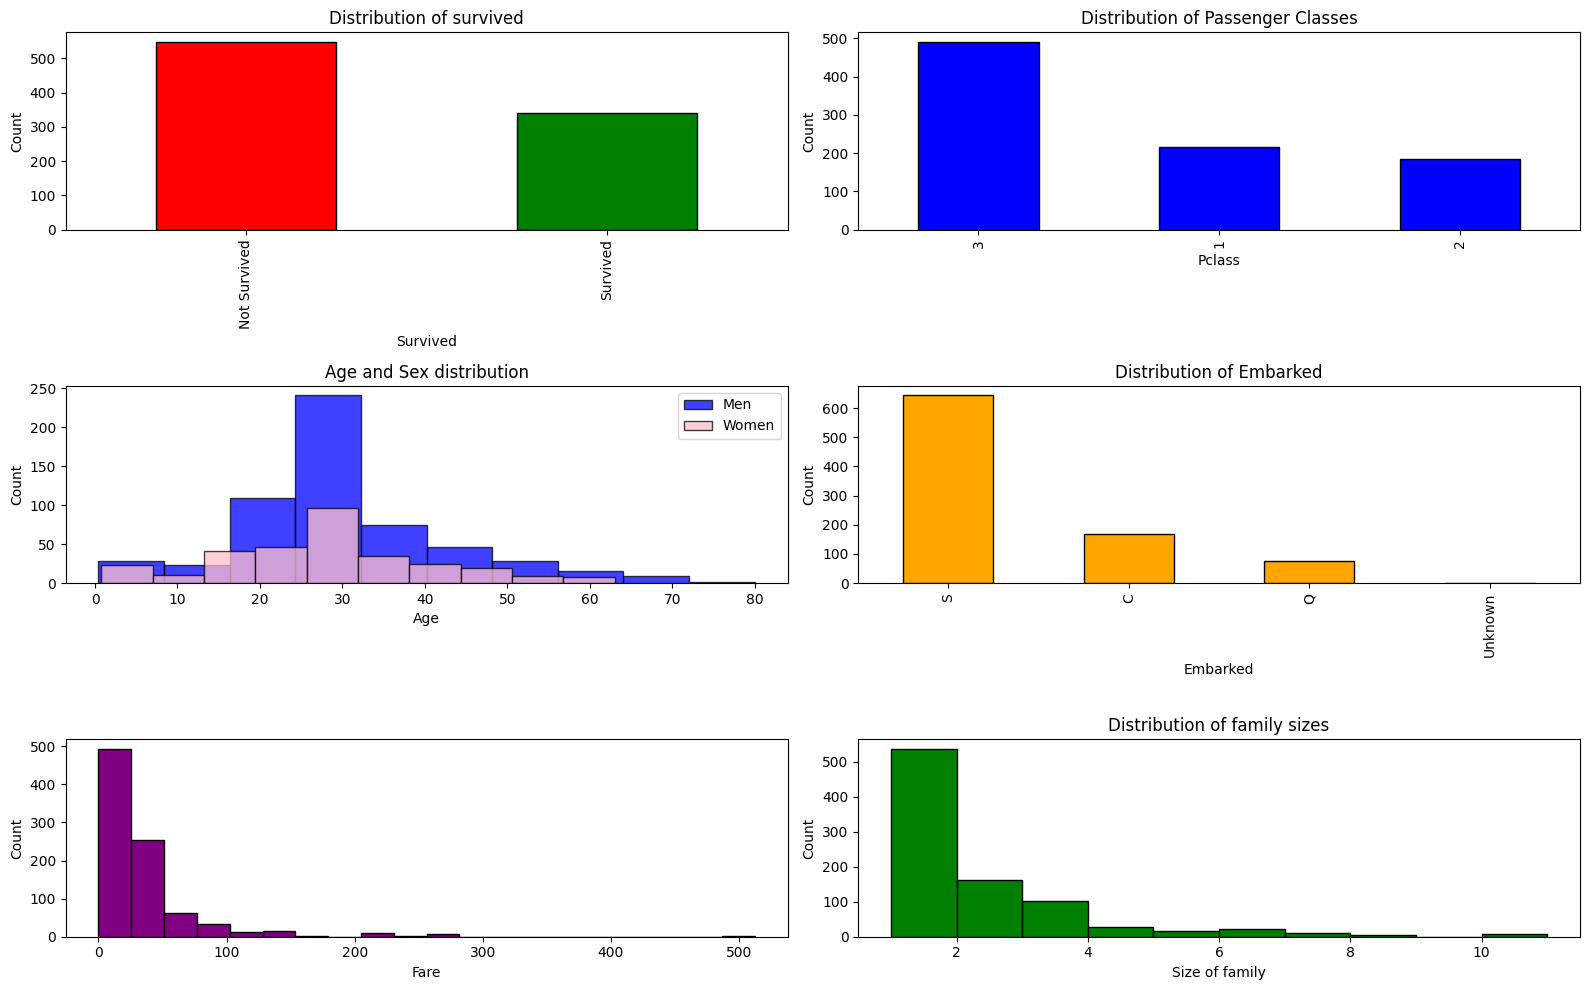

In [82]:
# Wykresy

plt.figure(figsize=(16, 10))

# Wykres przetrwa≈Ñ (wykres s≈Çupkowy)
survived_counts = titanic_df['Survived'].value_counts()
plt.subplot(3, 2, 1)
survived_counts.plot(kind='bar', color=['red', 'green'], edgecolor='black')
plt.xticks(range(2), ['Not Survived', 'Survived'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of survived')

# Klasy bilet√≥w (wykres s≈Çupkowy)

pclass_counts = titanic_df['Pclass'].value_counts()
plt.subplot(3, 2, 2)
pclass_counts.plot(kind='bar', color=['blue'], edgecolor='black')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Distribution of Passenger Classes')

# Sex i Age (histogram)

male_ages = titanic_df[titanic_df['Sex'] == 0]['Age']
female_ages = titanic_df[titanic_df['Sex'] == 1]['Age']
plt.subplot(3, 2, 3)
plt.hist(male_ages, bins=10, alpha=0.75, label='Men', color='blue', edgecolor = 'black')
plt.hist(female_ages, bins=10, alpha=0.75, label='Women', color='pink', edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age and Sex distribution')
plt.legend()

# Embarked (s≈Çupkowy)

embarked_counts = titanic_df['Embarked'].value_counts()
plt.subplot(3, 2, 4)
embarked_counts.plot(kind='bar', color=['orange'], edgecolor='black')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Distribution of Embarked')

# Fare (histogram)

fares = titanic_df['Fare']
plt.subplot(3, 2, 5)
plt.hist(fares, bins=20, color='purple', edgecolor = 'black')
plt.xlabel('Fare')
plt.ylabel('Count')

# Rozmiar rodziny (histogram)

families_size = titanic_df['SizeOfFamily']
plt.subplot(3, 2, 6)
plt.hist(families_size, bins=10, color='green', edgecolor = 'black')
plt.xlabel('Size of family')
plt.ylabel('Count')
plt.title('Distribution of family sizes')

plt.tight_layout()
plt.show()

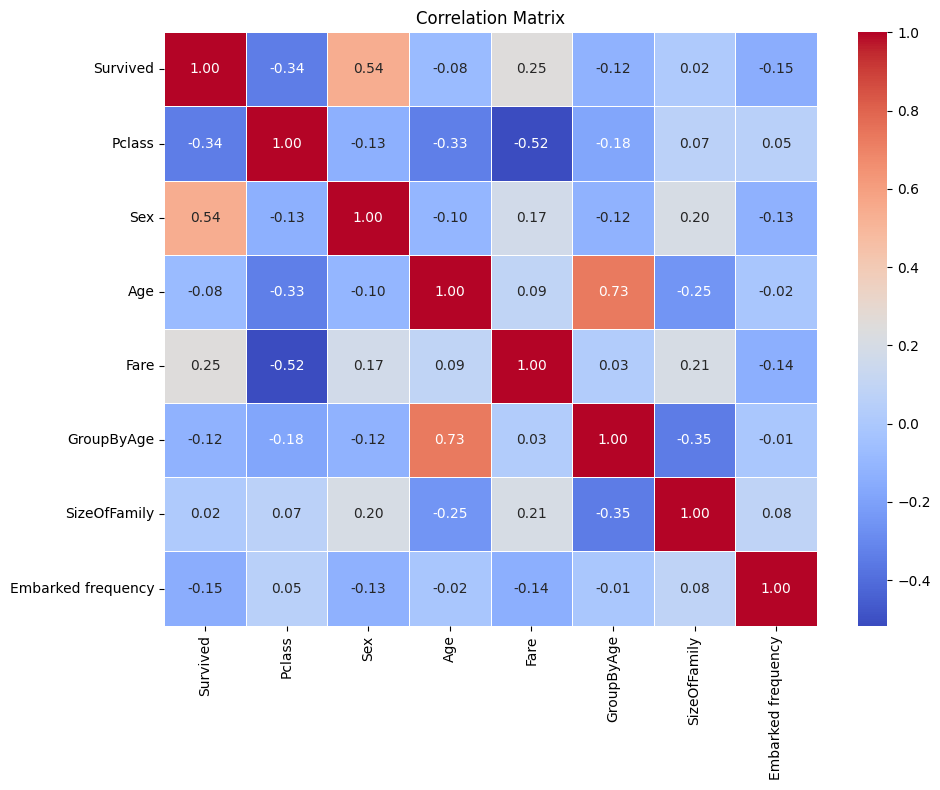

In [83]:
# Heatmapa

def plot_correlation_matrix(df):
    """
    Plots a heatmap showing the correlation matrix for numeric columns in the DataFrame.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing numeric data.
    Returns:
        None. Displays the correlation heatmap.
    """
    # compute correlation matrix only for numeric columns
    corr = df.corr(numeric_only=True)

    # fmt=".2f" rounds the number to 0.01
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

plot_correlation_matrix(titanic_df)

# **ROZWIƒÑZANIE ZADANIA 2 ML:**

In [84]:
titanic_df.head(5)
titanic_df.drop(columns = ['Embarked'], inplace = True) # Usuwam zeby model m√≥g≈Ç dzia≈Çaƒá

## **Podzia≈Ç danych:**

In [93]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop(columns=['Survived'], axis=1)
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Baseline, DummyClassifier:**
Wynik baseline'u to bƒôdzie nasz punkt odniesienia. Co do "strategy" naszego baseline'a to zdecydowa≈Çem siƒô na uniform, poniewa≈º przewiduje losowo, z r√≥wnym prawdopodobie≈Ñstwem.

In [97]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
dummy = DummyClassifier(strategy="uniform")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

print("Dummy Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("Classification Report:")
print(classification_report(y_test, y_pred_dummy))

Dummy Accuracy: 0.4972067039106145
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.53      0.55       105
           1       0.40      0.45      0.42        74

    accuracy                           0.50       179
   macro avg       0.49      0.49      0.49       179
weighted avg       0.51      0.50      0.50       179



teraz nale≈ºy modliƒá siƒô o wiƒôksze accuracy w naszym modelu üôè

## **Modele:**


### 1 model: Drzewo decyzyjne:

In [94]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(random_state=42, max_depth = 5, criterion='gini')
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(f"Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

Tree Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



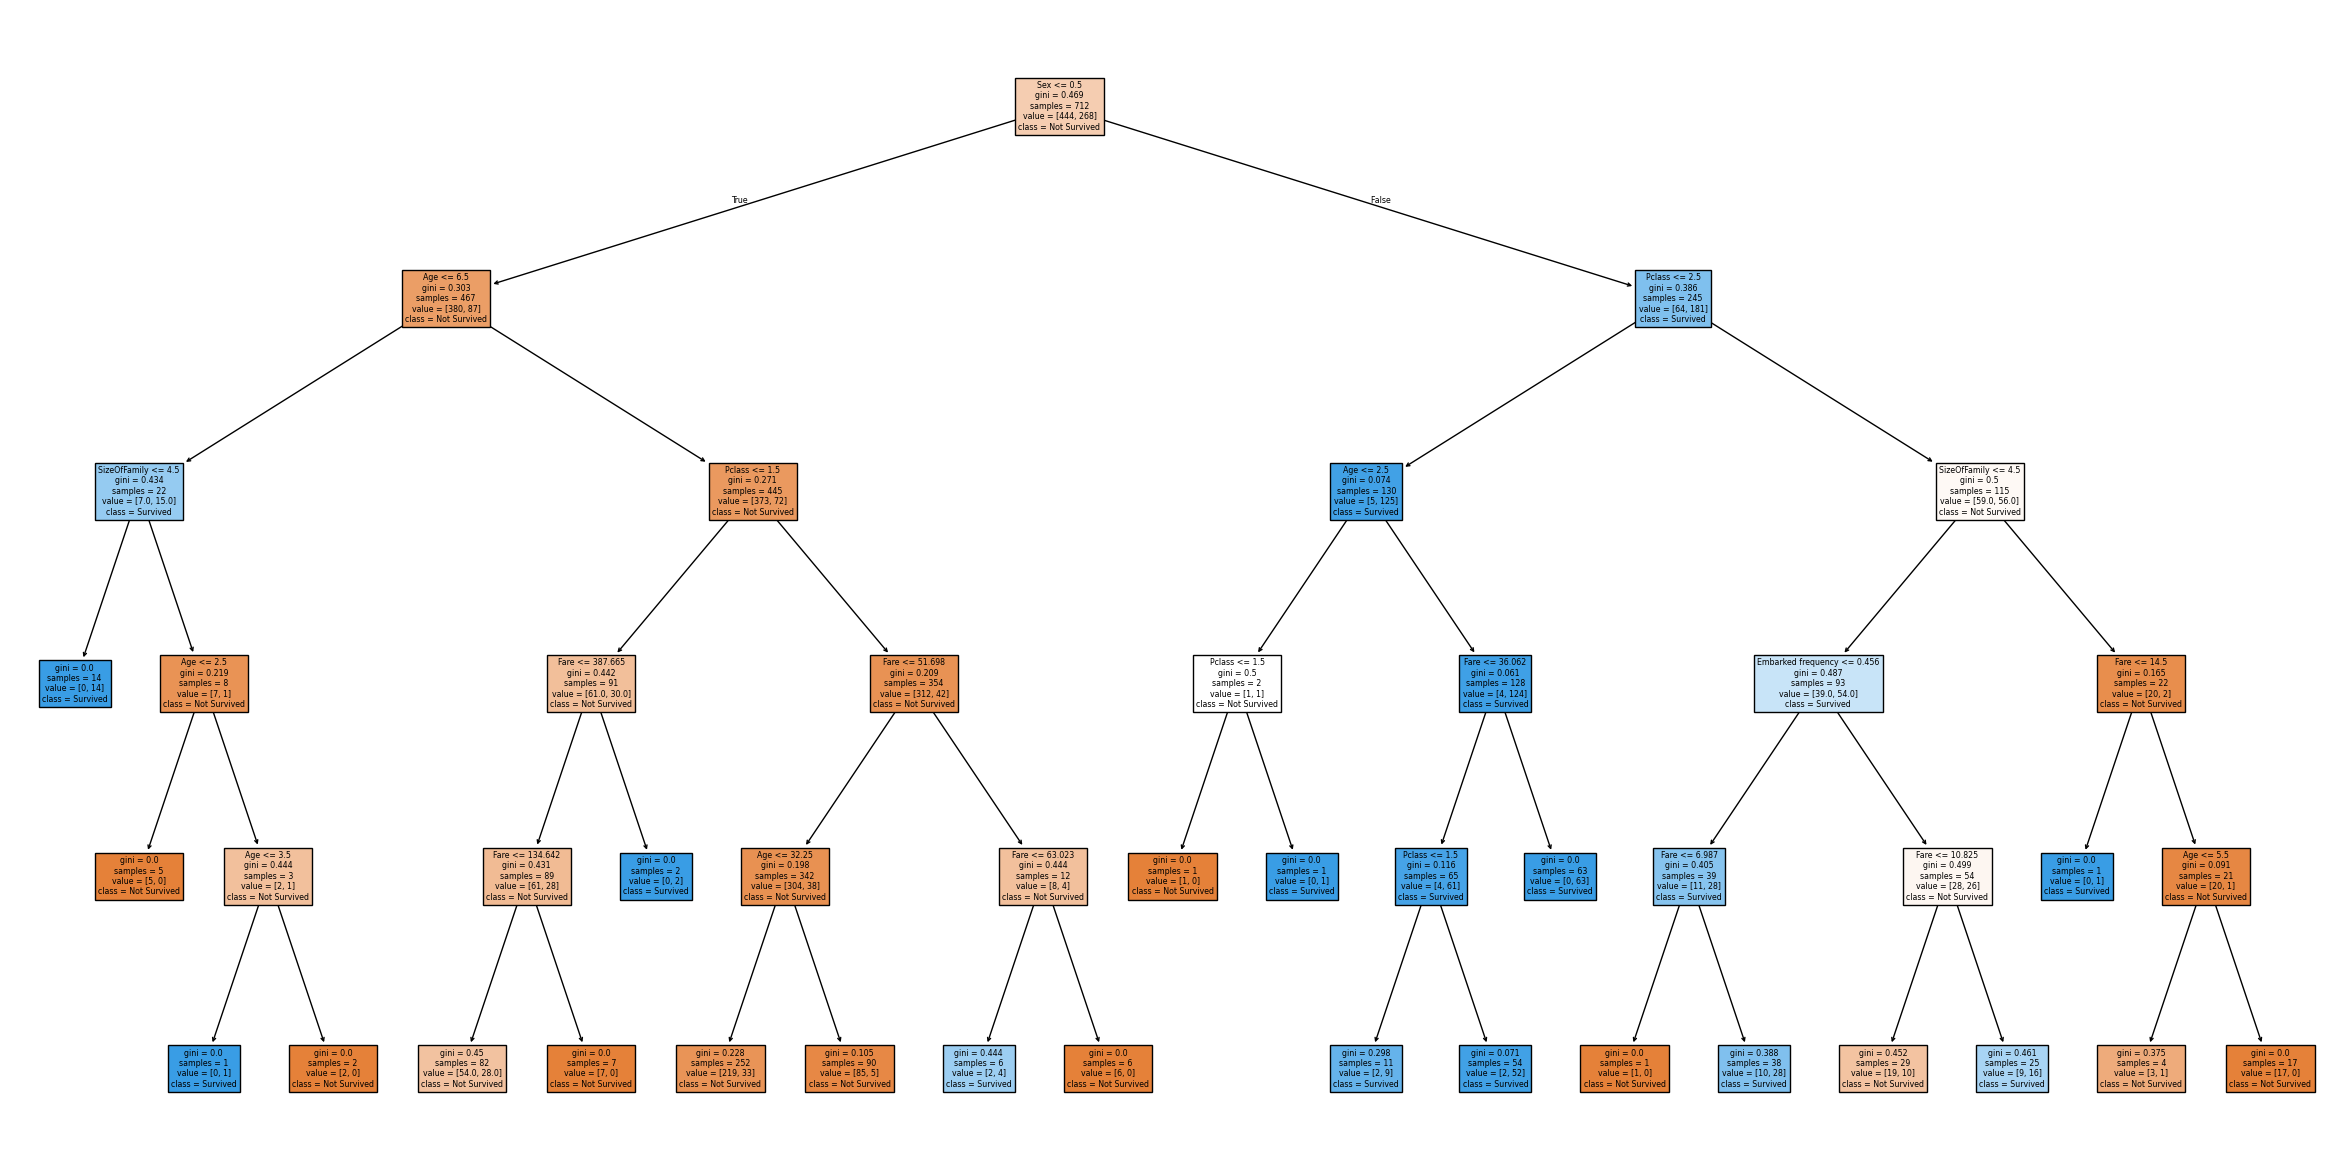

In [95]:
# Wizualizacja drzewka

plt.figure(figsize=(30, 15))
plot_tree(tree, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

Jest akceptowalnie bo uzyskali≈õmy lepsze wyniki niz dla baseline üêã

### 2 model: Metoda najbli≈ºszych sƒÖsiad√≥w KNN


In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       105
           1       0.78      0.58      0.67        74

    accuracy                           0.76       179
   macro avg       0.77      0.73      0.74       179
weighted avg       0.76      0.76      0.75       179



**Mo≈ºna zauwa≈ºyƒá ≈ºe:**

- KNN radzi sobie du≈ºo lepiej ni≈º losowy baseline (uniform), ale gorzej ni≈º drzewo decyzyjne.
- F1 = 0.6667 oznacza, ≈ºe KNN ma gorszƒÖ r√≥wnowagƒô miƒôdzy precision i recall ni≈º drzewo (0.75).
- Accuracy KNN jest te≈º ni≈ºsze (0.76 vs 0.81).

PodsumowujƒÖc KNN radzi sobie du≈ºo lepiej ni≈º losowy baseline, ale gorzej ni≈º drzewo decyzyjne.

## **Hiperparametry:**

U≈ºywam accuracy i F1, poniewa≈º accuracy jako sama dok≈Çadno≈õƒá wydajƒô siƒô byƒá coolerskƒÖ i cennƒÖ informacjƒÖ, za to F1 to trochƒô kompromis miƒôdzy recall i precision, i jest to ich ≈õrednia harmoniczna wiƒôc uzna≈Çem ≈ºe bƒôdzie chyba sensowna miara naszego "sukcesu"

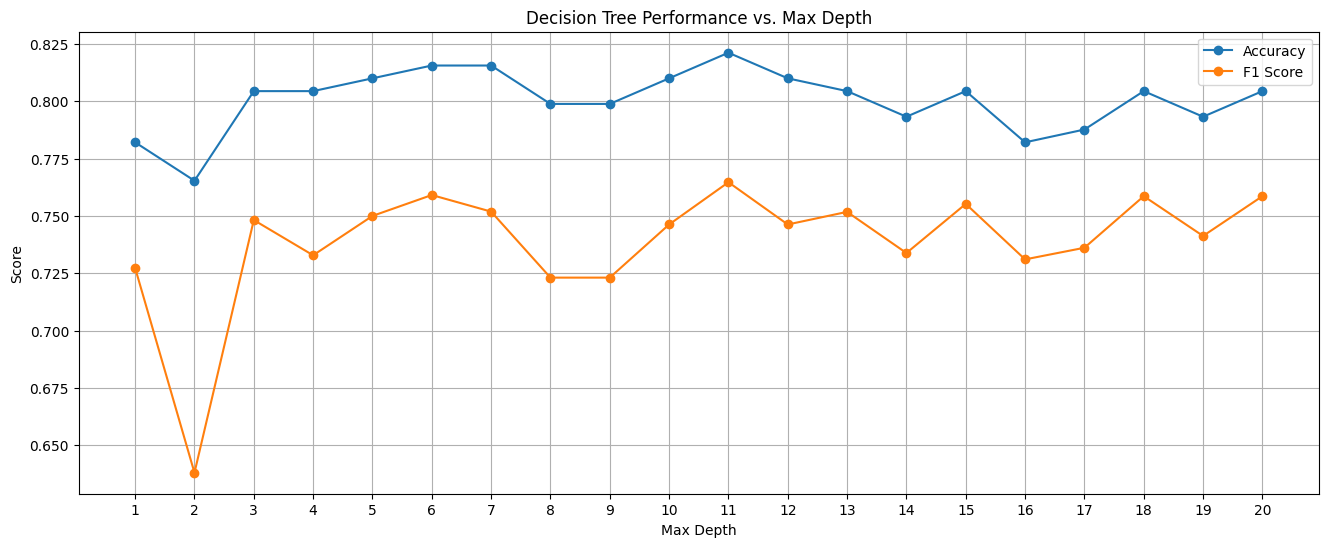

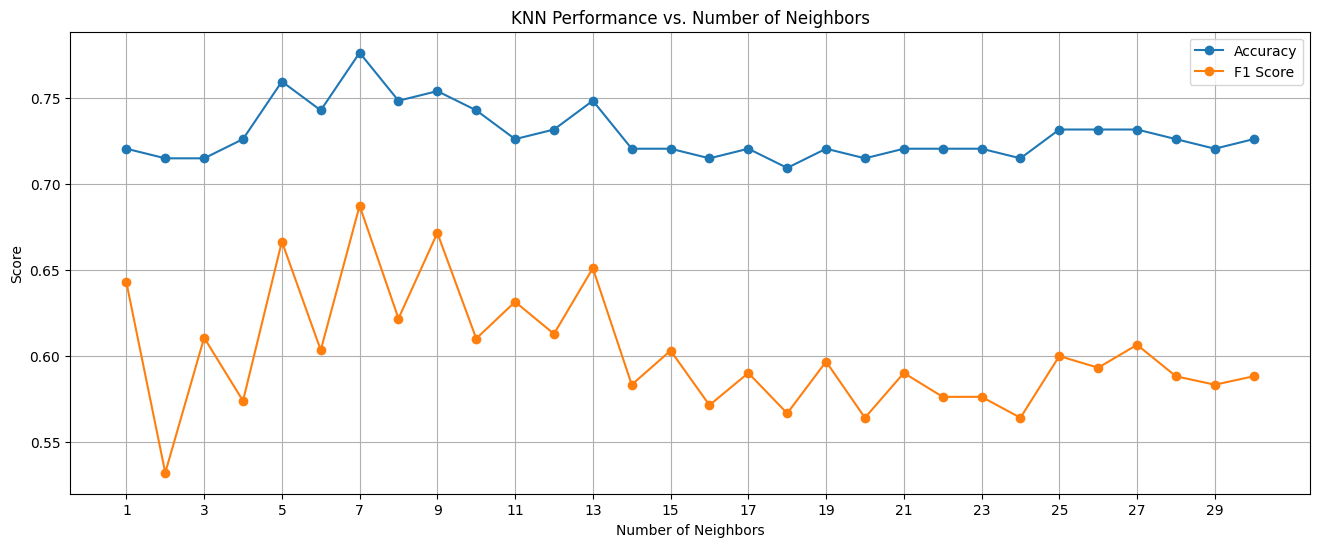

In [100]:
max_depths = range(1, 21)
tree_accuracy = []
tree_f1 = []


# Dla drzewka
for depth in max_depths:
    tree = DecisionTreeClassifier(random_state=42, max_depth=depth, criterion='gini')
    tree.fit(X_train, y_train)
    y_pred_tree = tree.predict(X_test)
    tree_accuracy.append(accuracy_score(y_test, y_pred_tree))
    tree_f1.append(f1_score(y_test, y_pred_tree))

plt.figure(figsize=(16, 6))
plt.plot(max_depths, tree_accuracy, marker='o', label='Accuracy')
plt.plot(max_depths, tree_f1, marker='o', label='F1 Score')
plt.title('Decision Tree Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.show()


# Dla sƒÖsiad√≥w
n_neighbors_values = range(1, 31)
knn_accuracy = []
knn_f1 = []

for n in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n, metric='cosine')
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    knn_accuracy.append(accuracy_score(y_test, y_pred_knn))
    knn_f1.append(f1_score(y_test, y_pred_knn))

plt.figure(figsize=(16, 6))
plt.plot(n_neighbors_values, knn_accuracy, marker='o', label='Accuracy')
plt.plot(n_neighbors_values, knn_f1, marker='o', label='F1 Score')
plt.title('KNN Performance vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.xticks(n_neighbors_values[::2])
plt.legend()
plt.grid(True)
plt.show()

PS. wiem ≈ºe to nie najlepsza praca i mog≈Çem siƒô bardziej postaraƒá, ale od czwartku do niedzieli mia≈Çem go≈õci, wiƒôc ciƒô≈ºko by≈Ço mi znale≈∫ƒá czas. Na nastƒôpnym zadanku obiecuje lepszy performance üôè

Materia≈Ç dowodowy: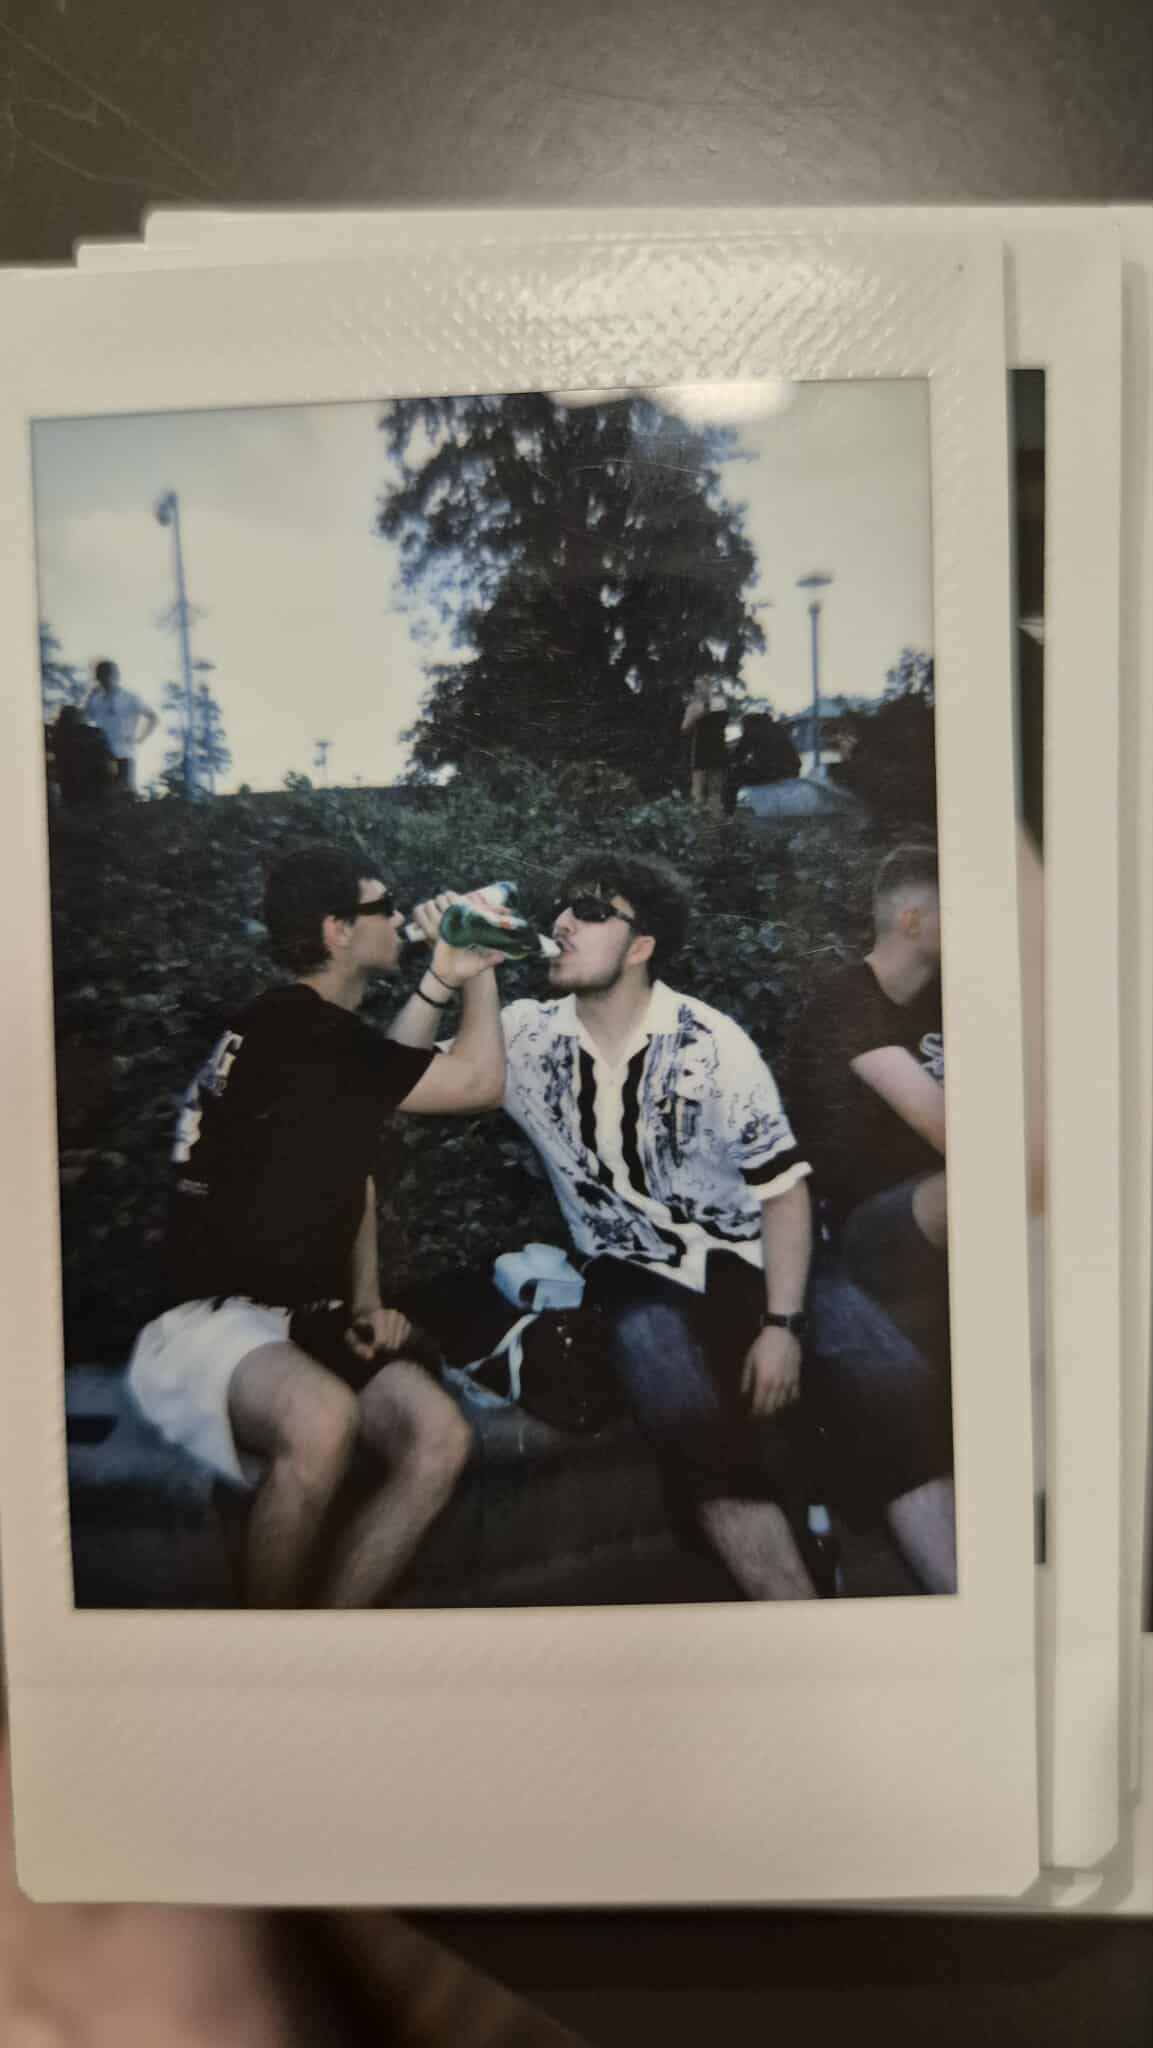